In [2]:
#Import Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# actMath_11
- District: 45
- Year (Features): 2017
- Grades: 11
- Values / dataSource: actMath
- Features: \['category_SCIENCE', 'category_SOCIAL_STUDIES', 'category_ENGLISH', 'category_MATHEMATICS', 'category_FOREIGN_LANGUAGE']
- Num features: 5
- Label: `proficient_score`
- Accuracy:
- F1: 
- Other metrics: RMSE 0.08; R^2 0.25
- Notes: Linear Regression likely unsuitable for this exam; different combinations of features yield similar results

In [1]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "..", "dataframes", "actMath_11_encoded_df.csv")
actMath11_df = pd.read_csv(filename, header = 0)

NameError: name 'os' is not defined

In [2]:
actMath11_df[actMath11_df.select_dtypes(include='bool').columns] = actMath11_df.select_dtypes(include='bool').astype(int)

actMath11_df.head()

NameError: name 'actMath11_df' is not defined

In [5]:
actMath11_df['proficient_score'] = np.log1p(actMath11_df['proficient_score'])

NameError: name 'actMath11_df' is not defined

In [6]:
# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = actMath11_df.corr()

# Extract the correlation values for 'proficient_score' and sort them in descending order
correlation_with_target = correlation_matrix['proficient_score'].sort_values(ascending=False)

# Display the correlations with proficient_score, excluding proficient_score itself
print(correlation_with_target.drop('proficient_score'))

NameError: name 'actMath11_df' is not defined

In [83]:
# features = ['category_SCIENCE', 'category_SOCIAL_STUDIES', 'category_ENGLISH', 'category_MATHEMATICS', 'category_FOREIGN_LANGUAGE']
toDrop = ['proficient_score', 'proficient_diff', 'studentId', 'is_proficient']
features = [col for col in actMath11_df.columns if col not in toDrop]

In [84]:
actMath11_df.columns

Index(['studentId', 'is_proficient', 'proficient_score', 'proficient_diff',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [85]:
#Create labeled examples from the dataset
#X = actMath11_df.drop(columns=['is_proficient', 'proficient_score', 'proficient_diff', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D'], inplace=False)
# X = actMath11_df[['category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
#        'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
#        'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
#        'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
#        'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
#        'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE']]
higher_correlated_features = ['category_SCIENCE', 'category_SOCIAL_STUDIES', 'category_ENGLISH', 'category_MATHEMATICS', 'category_PERFORMING_ARTS']
X = actMath11_df[features]
y = actMath11_df['proficient_score']

In [86]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 0.8  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

threshold= 0.8

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91       496
        True       0.43      0.26      0.33        80

    accuracy                           0.85       576
   macro avg       0.66      0.60      0.62       576
weighted avg       0.82      0.85      0.83       576


Confusion Matrix:
[[468  28]
 [ 59  21]]

Top 10 Most Important Features:
                    feature  importance
1      school_High School B        0.09
0      school_High School A        0.08
3      school_High School D        0.07
2      school_High School C        0.06
8          category_ENGLISH        0.03
9          category_SCIENCE        0.03
4               iready_math        0.02
10  category_SOCIAL_STUDIES        0.02
17     category_AGRICULTURE        0.02
15        category_BUSINESS        0.02


In [91]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.08
 R^2 =   0.26


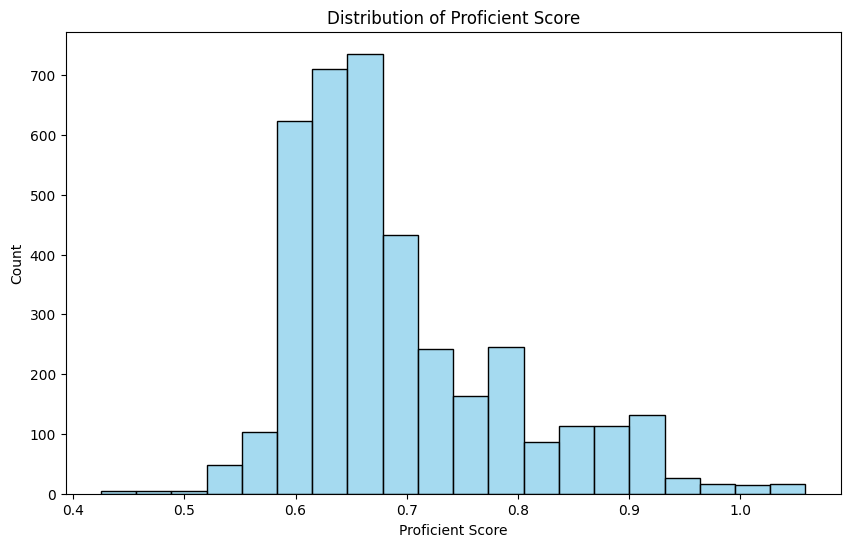

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(actMath11_df['proficient_score'], bins=20, kde=False, color='skyblue')  # You can adjust bins as necessary
plt.title('Distribution of Proficient Score')
plt.xlabel('Proficient Score')
plt.ylabel('Count')
plt.show()

Model Performance When I included all columns as features:
RMSE = 0.17
R^2 = 0.25

I got the same results above when I use only courses and only schools

Model Performance When only using vendors as features:
RMSE = 0.19
R^2 = -0.00

Model Performance when I take the log of proficient_score to help reduce the skew: RMSE: 0.08 and R^2 = 0.25

# scantronMath
- District: 45
- Year (Features): 2017
- Grades: 7, 6, 5, 8, 3, 4
- Values / dataSource: scantronMath
- Features: \[`past_proficient_score`, `course_Math 7 H/A`, `course_Eng 7 H/Adv`, `course_GeogH/AdvGr7`, `course_CivicH/Adv 7`, `course_ELAGrPK6H/Ad`, `course_SoSt6H/A`]
- Num features: 7
- Label: `proficient_score`
- Accuracy: RMSE: 0.06, R^2: 0.39
- F1: 
- Other metrics: 
- Notes: Only significantly correlated feature is past_proficient_score, linear regression may not be suitable because there are two linear relationships with past_proficient_score

In [46]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "scantronMath_38.csv")
scantronMath_df = pd.read_csv(filename, header = 0)

In [47]:
scantronMath_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.94,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.96
1,44783,7,value_scantronMath,False,0.97,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.95
2,44784,6,value_scantronMath,True,1.02,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.99
3,44807,7,value_scantronMath,True,1.02,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.04
4,44809,7,value_scantronMath,False,0.92,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.93


In [48]:
scantronMath_df[scantronMath_df.select_dtypes(include='bool').columns] = scantronMath_df.select_dtypes(include='bool').astype(int)

scantronMath_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,0,0.94,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.96
1,44783,7,value_scantronMath,0,0.97,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.95
2,44784,6,value_scantronMath,1,1.02,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.99
3,44807,7,value_scantronMath,1,1.02,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1.04
4,44809,7,value_scantronMath,0,0.92,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.93


In [49]:
scantronMath_df.drop(columns='dataSource', inplace=True)

In [50]:
# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = scantronMath_df.corr()

# Extract the correlation values for 'proficient_score' and sort them in descending order
correlation_with_target = correlation_matrix['proficient_score'].sort_values(ascending=False)

# Display the correlations with proficient_score, excluding proficient_score itself
print(correlation_with_target.drop('proficient_score'))

past_proficient_score    0.66
is_proficient            0.62
course_Math 7 H/A        0.10
course_Eng 7 H/Adv       0.08
course_GeogH/AdvGr7      0.08
                         ... 
course_CivicsGr 7       -0.04
course_English Gr 7     -0.05
course_Math 7           -0.07
course_StuHallPK6       -0.09
bbb_literacy              NaN
Name: proficient_score, Length: 140, dtype: float64


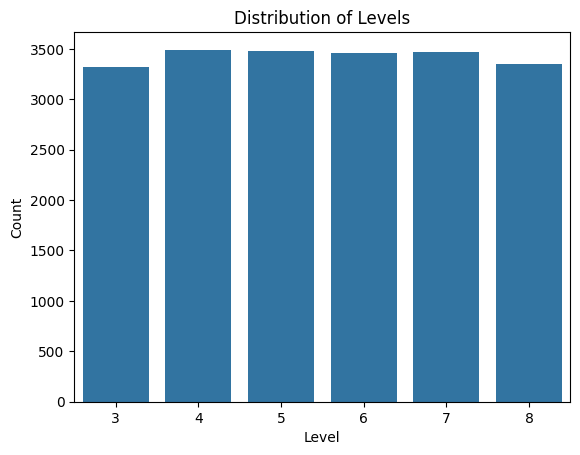

In [51]:
sns.countplot(x='level', data=scantronMath_df)

# Optional: Customize the plot
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')

# Show the plot
plt.show()

In [52]:
scantronMath_df['level'].unique()

array([7, 6, 5, 8, 3, 4])

In [53]:
correlation_with_target[:10]

proficient_score        1.00
past_proficient_score   0.66
is_proficient           0.62
course_Math 7 H/A       0.10
course_Eng 7 H/Adv      0.08
course_GeogH/AdvGr7     0.08
course_CivicH/Adv 7     0.08
level                   0.07
course_ELAGrPK6H/Ad     0.06
course_SoSt6H/A         0.06
Name: proficient_score, dtype: float64

In [54]:
nan_count = scantronMath_df.isna().sum()
nan_count

studentId                    0
level                        0
is_proficient                0
proficient_score             0
course_AIDELIB7-8NC          0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5422
Length: 141, dtype: int64

In [55]:
scantronMath_df = scantronMath_df.dropna()
scantronMath_df.isna().sum()

studentId                 0
level                     0
is_proficient             0
proficient_score          0
course_AIDELIB7-8NC       0
                         ..
school_Middle School F    0
iready_math               0
iready_reading            0
bbb_literacy              0
past_proficient_score     0
Length: 141, dtype: int64

In [56]:
scantronMath_df.shape

(15149, 141)

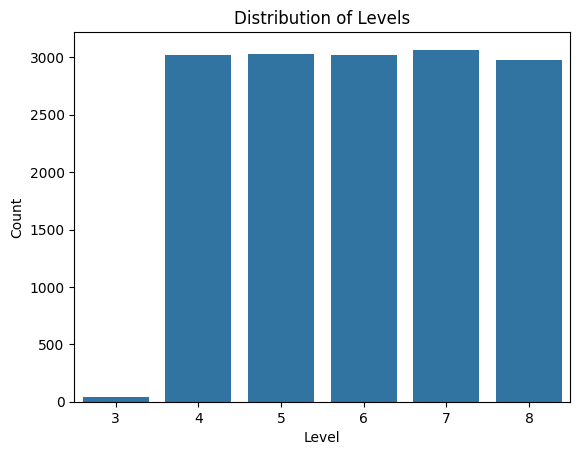

In [57]:
sns.countplot(x='level', data=scantronMath_df)

# Optional: Customize the plot
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')

# Show the plot
plt.show()

In [58]:
# features = ['past_proficient_score', 'course_Math 7 H/A', 'course_Eng 7 H/Adv', 'course_GeogH/AdvGr7', 'course_CivicH/Adv 7', 'course_ELAGrPK6H/Ad', 'course_SoSt6H/A']
# features = ['past_proficient_score', 'course_Math 7 H/A', 'course_Eng 7 H/Adv', 'course_GeogH/AdvGr7', 'course_CivicH/Adv 7', 'course_ELAGrPK6H/Ad', 'course_SoSt6H/A']
features = ['past_proficient_score']
X = scantronMath_df[features]
y = scantronMath_df['proficient_score']

In [59]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [61]:
# Assuming X is your feature set and y is your target variable
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)



feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print(feature_importance)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


past_proficient_score   0.64
dtype: float64
threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.95      0.90      1523
        True       0.87      0.65      0.75       750

    accuracy                           0.85      2273
   macro avg       0.86      0.80      0.82      2273
weighted avg       0.85      0.85      0.85      2273


Confusion Matrix:
[[1448   75]
 [ 259  491]]

Top 10 Most Important Features:
                 feature  importance
0  past_proficient_score        0.64


In [62]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.06
 R^2 =   0.38


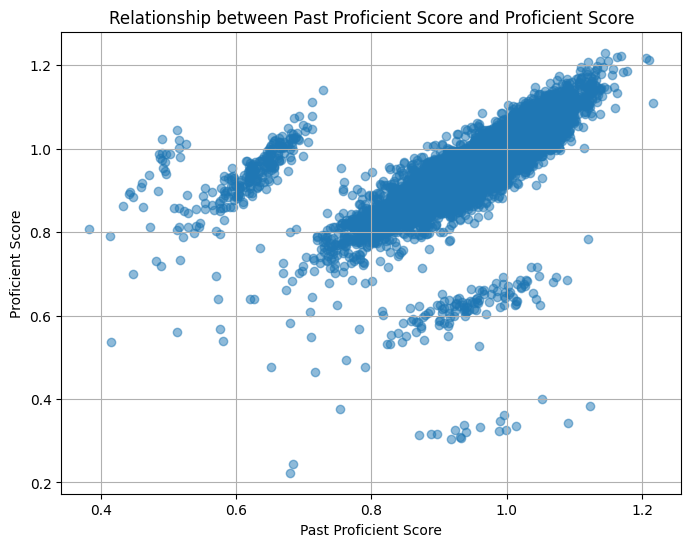

In [63]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scantronMath_df['past_proficient_score'], scantronMath_df['proficient_score'], alpha=0.5)
plt.title('Relationship between Past Proficient Score and Proficient Score')
plt.xlabel('Past Proficient Score')
plt.ylabel('Proficient Score')
plt.grid(True)
plt.show()

# scantronReading
- District: 45
- Year (Features): 2017
- Grades: 7, 6, 5, 8, 3, 4
- Values / dataSource: scantronReading
- Features: \[`past_proficient_score`, `course_Math 7 H/A`, `course_Eng 7 H/Adv`, `course_GeogH/AdvGr7`, `course_CivicH/Adv 7`, `course_ELAGrPK6H/Ad`, `course_SoSt6H/A`]
- Num features: 7
- Label: `proficient_score`
- Accuracy: RMSE: 0.07, R^2: 0.58
- F1: 
- Other metrics: 
- Notes: Similar correlating features to scantronMath

In [77]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "scantronReading_38.csv")
scantronReading_df = pd.read_csv(filename, header = 0)

In [78]:
scantronReading_df[scantronReading_df.select_dtypes(include='bool').columns] = scantronReading_df.select_dtypes(include='bool').astype(int)

In [79]:
scantronReading_df['level'].unique()

array([7, 6, 5, 8, 3, 4])

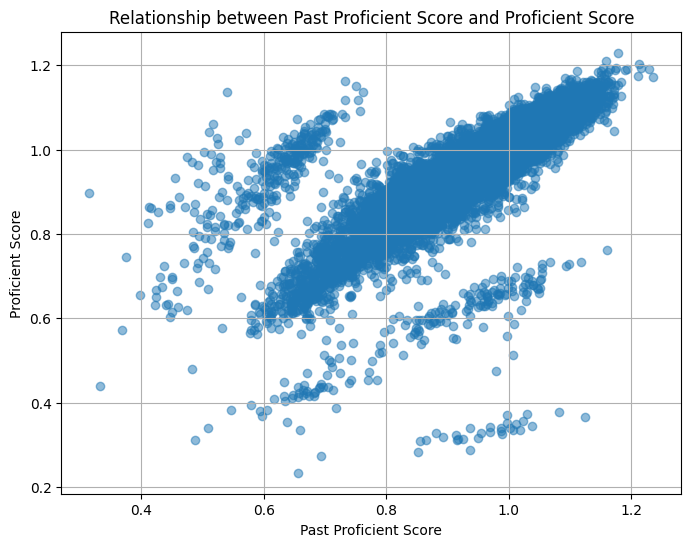

In [80]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scantronReading_df['past_proficient_score'], scantronReading_df['proficient_score'], alpha=0.5)
plt.title('Relationship between Past Proficient Score and Proficient Score')
plt.xlabel('Past Proficient Score')
plt.ylabel('Proficient Score')
plt.grid(True)
plt.show()

In [81]:
scantronReading_df.drop(columns='dataSource', inplace=True)

In [82]:
# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = scantronReading_df.corr()

# Extract the correlation values for 'proficient_score' and sort them in descending order
correlation_with_target = correlation_matrix['proficient_score'].sort_values(ascending=False)

# Display the correlations with proficient_score, excluding proficient_score itself
print(correlation_with_target.drop('proficient_score'))

past_proficient_score    0.77
is_proficient            0.67
course_Eng 7 H/Adv       0.07
course_Math 7 H/A        0.07
level                    0.06
                         ... 
course_Math 7           -0.04
course_READ 3           -0.04
course_English Gr 7     -0.05
course_StuHallPK6       -0.13
bbb_literacy              NaN
Name: proficient_score, Length: 140, dtype: float64


In [83]:
correlation_with_target[:10]

proficient_score        1.00
past_proficient_score   0.77
is_proficient           0.67
course_Eng 7 H/Adv      0.07
course_Math 7 H/A       0.07
level                   0.06
course_CivicH/Adv 7     0.06
course_GeogH/AdvGr7     0.06
course_LifeSciH Gr7     0.05
course_SciGr6H/A        0.05
Name: proficient_score, dtype: float64

In [84]:
nan_count = scantronReading_df.isna().sum()
nan_count

studentId                    0
level                        0
is_proficient                0
proficient_score             0
course_AIDELIB7-8NC          0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5280
Length: 141, dtype: int64

In [85]:
scantronReading_df = scantronReading_df.dropna()
scantronReading_df.isna().sum()

studentId                 0
level                     0
is_proficient             0
proficient_score          0
course_AIDELIB7-8NC       0
                         ..
school_Middle School F    0
iready_math               0
iready_reading            0
bbb_literacy              0
past_proficient_score     0
Length: 141, dtype: int64

In [86]:
scantronReading_df.shape

(15180, 141)

In [87]:
# features = ['past_proficient_score', 'course_Math 7 H/A', 'course_Eng 7 H/Adv', 'course_GeogH/AdvGr7', 'course_CivicH/Adv 7', 'course_ELAGrPK6H/Ad', 'course_SoSt6H/A']
features = ['past_proficient_score', 'course_Math 7 H/A', 'course_Eng 7 H/Adv', 'course_GeogH/AdvGr7', 'course_CivicH/Adv 7', 'course_ELAGrPK6H/Ad', 'course_SoSt6H/A']
X = scantronReading_df[features]
y = scantronReading_df['proficient_score']

In [88]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [89]:
# Assuming X is your feature set and y is your target variable
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print(feature_importance)

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.94      0.90      1392
        True       0.90      0.76      0.83       885

    accuracy                           0.87      2277
   macro avg       0.88      0.85      0.86      2277
weighted avg       0.88      0.87      0.87      2277


Confusion Matrix:
[[1314   78]
 [ 208  677]]

Top 10 Most Important Features:
                 feature       importance
3    course_GeogH/AdvGr7 2788940367841.04
4    course_CivicH/Adv 7 2788940367841.04
5    course_ELAGrPK6H/Ad     118464965.31
6        course_SoSt6H/A     118464965.29
0  past_proficient_score             0.75
1      course_Math 7 H/A             0.03
2     course_Eng 7 H/Adv             0.00
course_GeogH/AdvGr7     2788940367841.04
course_CivicH/Adv 7     2788940367841.04
course_ELAGrPK6H/Ad         118464965.31
course_SoSt6H/A             118464965.29
past_proficient_score               0.75
course_Math 7 

In [90]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.07
 R^2 =   0.57


# Using New Dataframes Comparing Training on 2017 Proficiency with 2018 as Label

Math

In [91]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "mathProficiency2017-2018.csv")
math_df = pd.read_csv(filename, header = 0)

In [92]:
math_df.head()

,studentId,mean_proficiency_2017,mean_proficiency_2018,studentLevel2017,studentLevel2018
0,44777,0.96,0.92,6.00,7.00
1,44783,0.95,0.97,6.00,7.00
2,44784,0.99,1.01,5.00,6.00
3,44807,1.04,1.01,6.00,7.00
4,44809,0.93,0.91,6.00,7.00


In [93]:
math_df = math_df.dropna()

<Axes: xlabel='mean_proficiency_2017', ylabel='mean_proficiency_2018'>

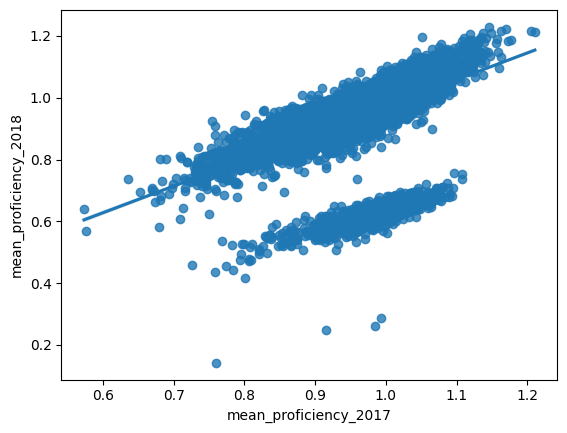

In [94]:
#Plotting 2017 and 2018 Proficiency Relationship
sns.regplot(x='mean_proficiency_2017', y='mean_proficiency_2018', data=math_df)

In [95]:
X = math_df[['mean_proficiency_2017']]
y = math_df['mean_proficiency_2018']

print(X)
print(y)

       mean_proficiency_2017
0                       0.96
1                       0.95
2                       0.99
3                       1.04
4                       0.93
...                      ...
15041                   0.94
15042                   1.08
15043                   0.96
15044                   0.97
15046                   0.91

[15046 rows x 1 columns]
0       0.92
1       0.97
2       1.01
3       1.01
4       0.91
        ... 
15041   0.97
15042   1.12
15043   0.95
15044   0.98
15046   0.94
Name: mean_proficiency_2018, Length: 15046, dtype: float64


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [97]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print(feature_importance)

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.97      0.89      1613
        True       0.86      0.45      0.59       644

    accuracy                           0.82      2257
   macro avg       0.84      0.71      0.74      2257
weighted avg       0.83      0.82      0.80      2257


Confusion Matrix:
[[1566   47]
 [ 352  292]]

Top 10 Most Important Features:
                 feature  importance
0  mean_proficiency_2017        0.87
mean_proficiency_2017   0.87
dtype: float64


In [98]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.09
 R^2 =   0.23


Text(0, 0.5, 'mean_proficiency_2018')

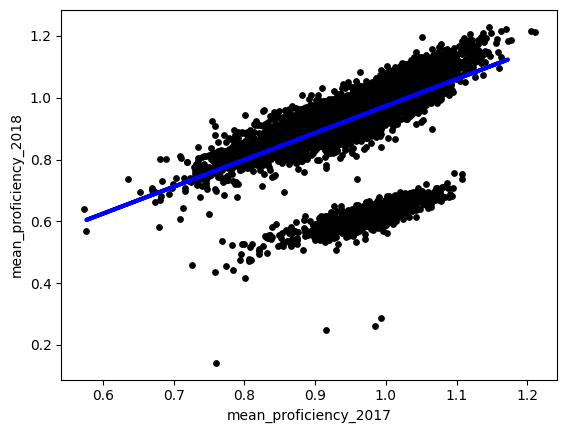

In [100]:
plt.scatter(X, y,  color='black',s=15)

plt.plot(X_test, prediction, color='blue', linewidth=3)

plt.xlabel('mean_proficiency_2017')
plt.ylabel('mean_proficiency_2018')

Reading

In [101]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "dataframes", "readingProficiency2017-2018.csv")
reading_df = pd.read_csv(filename, header = 0)

In [102]:
reading_df.head()

,studentId,mean_proficiency_2017,mean_proficiency_2018,studentLevel2017,studentLevel2018
0,44777,0.97,0.99,6,7
1,44783,1.01,1.00,6,7
2,44784,0.93,0.95,5,6
3,44807,1.03,1.01,6,7
4,44809,0.95,0.93,6,7


In [103]:
reading_df = reading_df.dropna()

In [104]:
reading_df.shape

(15074, 5)

<Axes: xlabel='mean_proficiency_2017', ylabel='mean_proficiency_2018'>

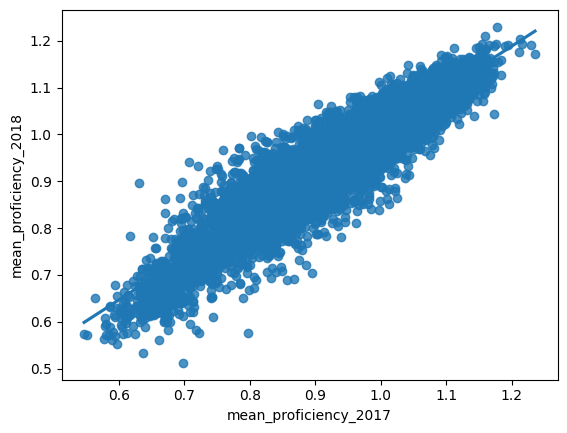

In [105]:
#Plotting 2017 and 2018 Proficiency Relationship
sns.regplot(x='mean_proficiency_2017', y='mean_proficiency_2018', data=reading_df)

In [106]:
X = reading_df[['mean_proficiency_2017']]
y = reading_df['mean_proficiency_2018']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [109]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)


# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print(feature_importance)

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.90      0.89      1359
        True       0.85      0.81      0.83       903

    accuracy                           0.86      2262
   macro avg       0.86      0.85      0.86      2262
weighted avg       0.86      0.86      0.86      2262


Confusion Matrix:
[[1229  130]
 [ 176  727]]

Top 10 Most Important Features:
                 feature  importance
0  mean_proficiency_2017        0.90
mean_proficiency_2017   0.90
dtype: float64


In [110]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.04
 R^2 =   0.85


Text(0, 0.5, 'mean_proficiency_2018')

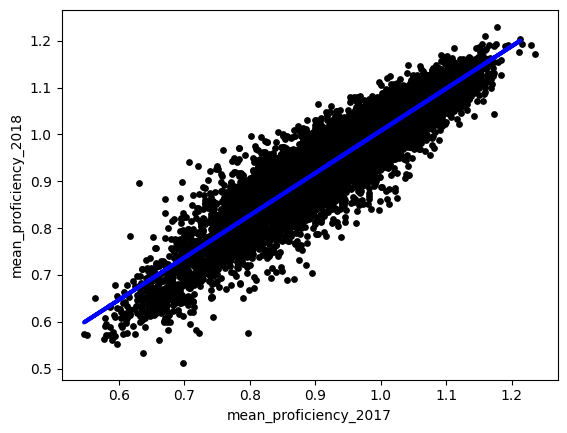

In [27]:
plt.scatter(X, y,  color='black',s=15)

plt.plot(X_test, prediction, color='blue', linewidth=3)

plt.xlabel('mean_proficiency_2017')
plt.ylabel('mean_proficiency_2018')
